Total logins: 1005
Failed logins: 819
Flagged suspicious IPs: 5


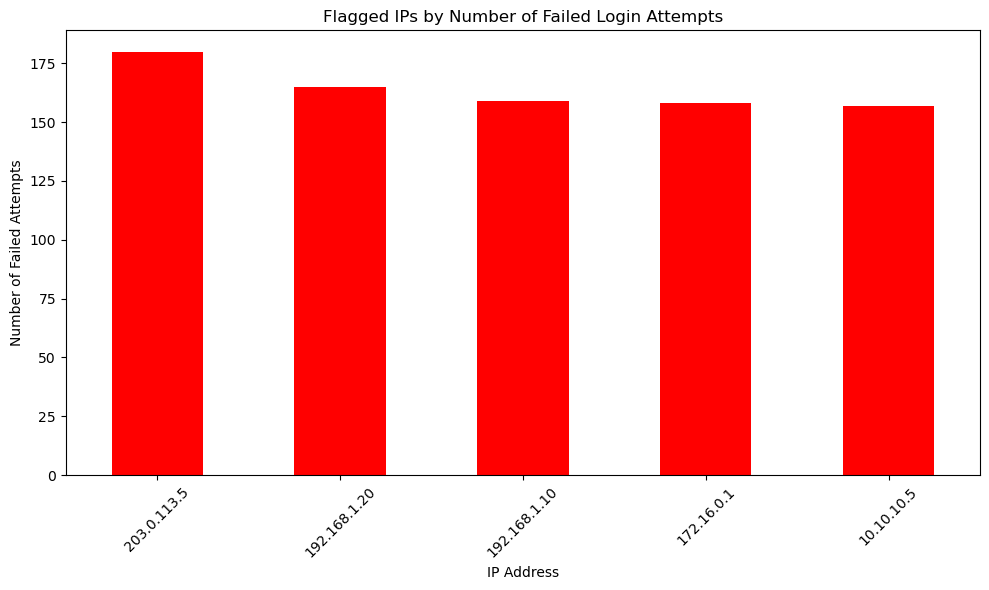

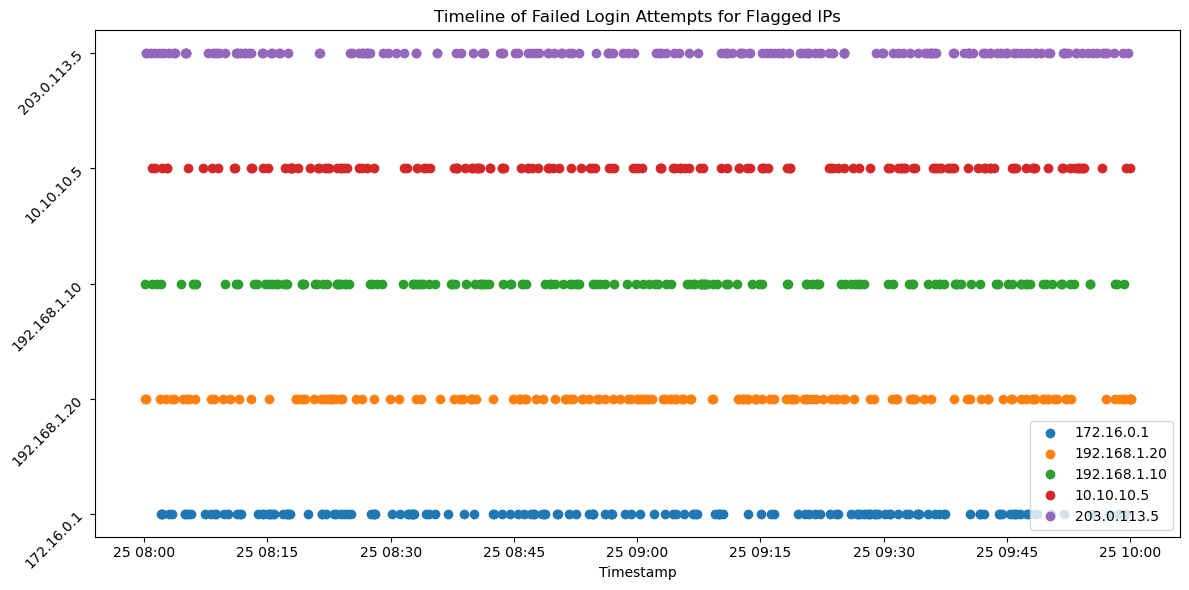

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load logs
df = pd.read_csv("auth_logs.csv", parse_dates=["timestamp"])

# Check if the flagged_ips.csv file exists in the current directory instead
try:
    # Try current directory first
    flagged = pd.read_csv("flagged_ips.csv")
except FileNotFoundError:
    # If that fails, create a simple placeholder for demonstration
    print("Warning: flagged_ips.csv not found. Creating a placeholder for demonstration.")
    # Create a sample flagged IPs dataframe using the top 5 IPs with failed logins
    failed_df = df[df['auth_result'] == 'FAIL']
    top_failed_ips = failed_df['source_ip'].value_counts().head(5).index.tolist()
    flagged = pd.DataFrame({'suspicious_ip': top_failed_ips})

# Summary statistics
total_logins = len(df)
failed_logins = len(df[df['auth_result'] == 'FAIL'])
unique_flagged_ips = len(flagged)

print(f"Total logins: {total_logins}")
print(f"Failed logins: {failed_logins}")
print(f"Flagged suspicious IPs: {unique_flagged_ips}")

# Filter failed logins
failed_df = df[df['auth_result'] == 'FAIL']

# Count failed attempts per IP
failed_counts = failed_df['source_ip'].value_counts()

# Keep counts for flagged IPs only
flagged_counts = failed_counts[failed_counts.index.isin(flagged['suspicious_ip'])]

plt.figure(figsize=(10,6))
flagged_counts.sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Flagged IPs by Number of Failed Login Attempts')
plt.xlabel('IP Address')
plt.ylabel('Number of Failed Attempts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))

for ip in flagged['suspicious_ip']:
    ip_df = failed_df[failed_df['source_ip'] == ip]
    plt.plot(ip_df['timestamp'], [ip]*len(ip_df), 'o', label=ip)

plt.title('Timeline of Failed Login Attempts for Flagged IPs')
plt.xlabel('Timestamp')
plt.yticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
